# Pandas

Series - столбец данных (вектор).

DataFrame - таблица данных (csv обычно).

In [3]:
import pandas as pd # загрузка pandas
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Создание объекта класса Series
salaries = pd.Series(data = [400, 300, 200, 250], index = ["Andrew", "Bob", "John", "Ann"])

In [6]:
print(salaries)

Andrew    400
Bob       300
John      200
Ann       250
dtype: int64


In [7]:
type(salaries)

pandas.core.series.Series

In [8]:
salaries.Andrew # индексирование Series

400

In [10]:
salaries["Andrew"] # индексирование Series

400

In [15]:
salaries["Bob"] = 1000 # замена значения в series

In [16]:
salaries

Andrew     400
Bob       1000
John       200
Ann        250
dtype: int64

In [18]:
salaries["Bob"] = np.NAN # замена пустым значением

In [19]:
salaries

Andrew    400.0
Bob         NaN
John      200.0
Ann       250.0
dtype: float64

In [22]:
salaries["George"] = 10000000

In [25]:
salaries.mean(), salaries.median() # Медиана робастна к выбросам (устойчива)

(2500212.5, 325.0)

In [26]:
salaries

Andrew         400.0
Bob              NaN
John           200.0
Ann            250.0
George    10000000.0
dtype: float64

In [31]:
salaries.fillna(salaries.median(), inplace = True) 

#"""заменяем пустое значение NaN на медианное
#inplace = True - чтобы изменить первоначальный объект
#"""

'заменяем пустое значение NaN на медианное\ninplace = True - чтобы изменить первоначальный объект\n'

In [30]:
print(salaries)

Andrew         400.0
Bob            325.0
John           200.0
Ann            250.0
George    10000000.0
dtype: float64


# DataFrame

**1-й способ создания DataFrame**

In [33]:
df1 = pd.DataFrame(data = np.random.randn(5,3), 
                   index = ["s1", "s2", "s3", "s4", "s5"],
                  columns = ["col1", "col2", "col3"])

In [34]:
print(df1)

        col1      col2      col3
s1 -0.871338  1.134432 -2.106866
s2 -0.661060  1.470402 -1.291175
s3 -0.254749 -0.311897  0.684874
s4 -0.524485  0.285844 -0.433888
s5  1.007432 -0.860260  0.848190


In [35]:
df1

,col1,col2,col3
s1,-0.871338,1.134432,-2.106866
s2,-0.661060,1.470402,-1.291175
s3,-0.254749,-0.311897,0.684874
s4,-0.524485,0.285844,-0.433888
s5,1.007432,-0.860260,0.848190


**Альтернативный способ создания DataFrame c помощью словаря**

In [36]:
df2 = pd.DataFrame({"A": np.random.random(5),
                    "B": ["a", "b", "c", "d", "e"],
                    "C": np.arange(5) > 2
})

In [37]:
df2

,A,B,C
0,0.087907,a,False
1,0.061819,b,False
2,0.070295,c,False
3,0.210861,d,True
4,0.962754,e,True


In [41]:
df1.info() # основная информация о DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, s1 to s5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      float64
 1   col2    5 non-null      float64
 2   col3    5 non-null      float64
dtypes: float64(3)
memory usage: 160.0+ bytes


In [42]:
df2.info() # основная информация о DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      object 
 2   C       5 non-null      bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 213.0+ bytes


In [43]:
df2.shape

(5, 3)

In [44]:
df1.shape

(5, 3)

## Обращение к элементам DataFrame

In [45]:
df2

,A,B,C
0,0.087907,a,False
1,0.061819,b,False
2,0.070295,c,False
3,0.210861,d,True
4,0.962754,e,True


In [52]:
df2.loc[[1,4], ["A", "B"]] # 1 и 4 строки столбцов A and B (названия строк и названия столбцов)

,A,B
1,0.061819,b
4,0.962754,e


In [58]:
df2.iloc[2:4, 0:2] # срез по индексам DataFrame

,A,B
2,0.070295,c
3,0.210861,d


In [57]:
df2["A"] # обращение к столбцу DataFrame

0    0.087907
1    0.061819
2    0.070295
3    0.210861
4    0.962754
Name: A, dtype: float64

In [61]:
df2["A"][1] # Первая строка столбца A

0.061819264643940386

In [68]:
df2[["A", "B"]].iloc[:3] # Первые три строки столбцов A и B

,A,B
0,0.087907,a
1,0.061819,b
2,0.070295,c


## Объединение DataFram-ов 

In [70]:
df2.columns, df1.columns # вывод названий колонк двух датафреймов

(Index(['A', 'B', 'C'], dtype='object'),
 Index(['col1', 'col2', 'col3'], dtype='object'))

In [71]:
df1.columns = ["A", "B", "C"]

In [74]:
df1.head(2) # выводим 2 первые строки из данных

,A,B,C
s1,-0.871338,1.134432,-2.106866
s2,-0.661060,1.470402,-1.291175


In [76]:
df1.tail(2) # две последних строки

,A,B,C
s4,-0.524485,0.285844,-0.433888
s5,1.007432,-0.860260,0.848190


In [82]:
df3 = df1.append(df2)
df3

,A,B,C
s1,-0.871338,1.13443,-2.106866
s2,-0.661060,1.4704,-1.291175
s3,-0.254749,-0.311897,0.684874
s4,-0.524485,0.285844,-0.433888
s5,1.007432,-0.86026,0.848190
0,0.087907,a,0.000000
1,0.061819,b,0.000000
2,0.070295,c,0.000000
3,0.210861,d,1.000000
4,0.962754,e,1.000000


In [83]:
df3 = df3.reset_index() # сбрасывает индексы и делает от 0 до n

,index,A,B,C
0,s1,-0.871338,1.13443,-2.106866
1,s2,-0.661060,1.4704,-1.291175
2,s3,-0.254749,-0.311897,0.684874
3,s4,-0.524485,0.285844,-0.433888
4,s5,1.007432,-0.86026,0.848190
5,0,0.087907,a,0.000000
6,1,0.061819,b,0.000000
7,2,0.070295,c,0.000000
8,3,0.210861,d,1.000000
9,4,0.962754,e,1.000000


In [85]:
df3.head() # выводим первые пять строк

,index,A,B,C
0,s1,-0.871338,1.13443,-2.106866
1,s2,-0.661060,1.4704,-1.291175
2,s3,-0.254749,-0.311897,0.684874
3,s4,-0.524485,0.285844,-0.433888
4,s5,1.007432,-0.86026,0.848190


In [89]:
df3.drop("index", axis = 1, inplace = True) # удаление столбца из данных

In [90]:
df3.head()

,A,B,C
0,-0.871338,1.13443,-2.106866
1,-0.661060,1.4704,-1.291175
2,-0.254749,-0.311897,0.684874
3,-0.524485,0.285844,-0.433888
4,1.007432,-0.86026,0.848190


In [92]:
df1.index = range(5) # замена индексов в датафрейме

In [93]:
df1.head(2)

,A,B,C
0,-0.871338,1.134432,-2.106866
1,-0.661060,1.470402,-1.291175


In [94]:
df4 = pd.concat([df1, df2], axis = 1) # склеивание датафреймов по столбцам (axis = 1)

In [95]:
df4.head()

,A,B,C,A,B,C
0,-0.871338,1.134432,-2.106866,0.087907,a,False
1,-0.661060,1.470402,-1.291175,0.061819,b,False
2,-0.254749,-0.311897,0.684874,0.070295,c,False
3,-0.524485,0.285844,-0.433888,0.210861,d,True
4,1.007432,-0.860260,0.848190,0.962754,e,True


In [96]:
df4.columns = ["A", "B", "C", "D", "E", "G"] # меняем названия колонок

In [97]:
df4

,A,B,C,D,E,G
0,-0.871338,1.134432,-2.106866,0.087907,a,False
1,-0.661060,1.470402,-1.291175,0.061819,b,False
2,-0.254749,-0.311897,0.684874,0.070295,c,False
3,-0.524485,0.285844,-0.433888,0.210861,d,True
4,1.007432,-0.860260,0.848190,0.962754,e,True


In [98]:
df4.iloc[1:3, 2:4] = np.NAN

In [99]:
df4

,A,B,C,D,E,G
0,-0.871338,1.134432,-2.106866,0.087907,a,False
1,-0.661060,1.470402,NaN,NaN,b,False
2,-0.254749,-0.311897,NaN,NaN,c,False
3,-0.524485,0.285844,-0.433888,0.210861,d,True
4,1.007432,-0.860260,0.848190,0.962754,e,True


In [102]:
df4.isna().sum() # проверяем наличие пропусков 

A    0
B    0
C    2
D    2
E    0
G    0
dtype: int64

In [103]:
df4.fillna(df4.median(), inplace = True) # замена пропусков на медианные значения

In [104]:
df4.head()

,A,B,C,D,E,G
0,-0.871338,1.134432,-2.106866,0.087907,a,False
1,-0.661060,1.470402,-0.433888,0.210861,b,False
2,-0.254749,-0.311897,-0.433888,0.210861,c,False
3,-0.524485,0.285844,-0.433888,0.210861,d,True
4,1.007432,-0.860260,0.848190,0.962754,e,True


In [105]:
df4.drop([2,4], axis = 0) # удаление строк 2 и 4

,A,B,C,D,E,G
0,-0.871338,1.134432,-2.106866,0.087907,a,False
1,-0.661060,1.470402,-0.433888,0.210861,b,False
3,-0.524485,0.285844,-0.433888,0.210861,d,True


In [106]:
df4.iloc[1:3, 2:4] = np.NAN

In [107]:
df4

,A,B,C,D,E,G
0,-0.871338,1.134432,-2.106866,0.087907,a,False
1,-0.661060,1.470402,NaN,NaN,b,False
2,-0.254749,-0.311897,NaN,NaN,c,False
3,-0.524485,0.285844,-0.433888,0.210861,d,True
4,1.007432,-0.860260,0.848190,0.962754,e,True


In [109]:
df4.dropna(how="any", inplace = True) # удаляем строки, где есть хотя бы один пропуск

In [110]:
df4

,A,B,C,D,E,G
0,-0.871338,1.134432,-2.106866,0.087907,a,False
3,-0.524485,0.285844,-0.433888,0.210861,d,True
4,1.007432,-0.860260,0.848190,0.962754,e,True


# Первичный анализ данных в Pandas

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("beauty.csv", sep = ";") # загрузка данных с файла csv

In [32]:
df.head() # первые пять строк таблицы

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [33]:
df.tail() # последние пять строк

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3
1259,1.92,24,0,0,0,1,0,1,16,3


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [35]:
df.shape # сколько строк, сколько столбцов

(1260, 10)

In [36]:
df.columns # названия столбцов

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [37]:
df.describe().T # Все описательные статистики данных (среднее, СКО, минимум, максимум, квартили, медиана)

,count,mean,std,min,25%,50%,75%,max
wage,1260.0,6.306690,4.660639,1.02,3.7075,5.3,7.695,77.72
exper,1260.0,18.206349,11.963485,0.00,8.0000,15.0,27.000,48.00
union,1260.0,0.272222,0.445280,0.00,0.0000,0.0,1.000,1.00
goodhlth,1260.0,0.933333,0.249543,0.00,1.0000,1.0,1.000,1.00
black,1260.0,0.073810,0.261564,0.00,0.0000,0.0,0.000,1.00
female,1260.0,0.346032,0.475892,0.00,0.0000,0.0,1.000,1.00
married,1260.0,0.691270,0.462153,0.00,0.0000,1.0,1.000,1.00
service,1260.0,0.273810,0.446089,0.00,0.0000,0.0,1.000,1.00
educ,1260.0,12.563492,2.624489,5.00,12.0000,12.0,13.000,17.00
looks,1260.0,3.185714,0.684877,1.00,3.0000,3.0,4.000,5.00


In [38]:
df["exper"].mean() # средний опыт работы по всем наблюдениям

18.206349206349206

In [39]:
df["exper"].median() # медианное значение опыта работы по всем наблюдениям

15.0

In [40]:
df["exper"].std() # дисперсия по столбцу

11.96348525775782

In [41]:
df["female"].unique() # уникальные значения столбца female

array([1, 0])

In [42]:
df["female"].value_counts() # распределение по уникальным значениям (т.е. сколько мужчин, сколько женщин)
# 0 - мужчины, 1 - женщины

0    824
1    436
Name: female, dtype: int64

In [43]:
df[df["female"] == 1] # отбираем все строки с женщинами

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [44]:
df[df["female"] == 0] # отбираем все строки с мужчинами

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
6,8.76,12,0,1,0,0,1,0,16,3
7,7.69,5,1,1,0,0,0,0,16,4
11,4.03,6,0,1,0,0,1,0,16,4
...,...,...,...,...,...,...,...,...,...,...
1248,10.58,19,0,1,0,0,0,0,16,4
1249,8.65,10,1,1,0,0,1,0,13,3
1250,4.17,13,0,1,0,0,1,0,10,3
1251,6.81,7,1,1,0,0,0,0,12,3


In [45]:
df[(df["goodhlth"] == 1) & (df["female"] == 1)] # все женщины с хорошим здоровьем

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3
...,...,...,...,...,...,...,...,...,...,...
1254,1.79,20,0,1,0,1,1,1,8,3
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3


In [46]:
# выберем всех женщин и посчитаем средний заработок за час
df[df["female"] == 1]["wage"].mean()

4.299357798165137

In [47]:
int(df[df["female"] == 1]["wage"].mean()) # округляем результат

4

In [48]:
# выберем всех мужчин и посчитаем средний заработок за час
df[df["female"] == 0]["wage"].mean()

7.3688228155339806

In [49]:
# выберем всех мужчин и посчитаем средний заработок за час
int(df[df["female"] == 0]["wage"].mean())

7

# Задача к данным

Какова максимальная зарплата среди мужчин, имеющих членство в профсоюзе и с опытом работы до 10 лет

In [50]:
df[(df["union"] == 1) & (df["female"] == 0) & (df["exper"] < 10)]["wage"].max()

12.82

In [51]:
# Сортировка

df.sort_values(by="wage", ascending=False) # сортировка по столбцу с зарплатой по убыванию (ascending=False)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
...,...,...,...,...,...,...,...,...,...,...
597,1.16,5,0,1,0,1,1,1,10,3
462,1.16,2,0,1,0,1,0,0,13,4
1226,1.09,8,0,1,0,1,1,1,10,2
1009,1.05,29,0,1,1,0,1,0,5,3


In [52]:
# Сортировка

df.sort_values(by=["wage", "female"], ascending=[False, False]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [53]:
df.mean()

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [54]:
df.apply(np.mean) # применение функции ко всем столбцам датафрейма

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

# Визуализация многомерных данных

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns # загрузка библиотеки seaborn

#plt.style.use('ggplot') # используем новый стиль оформления графиков
plt.rcParams["figure.figsize"] = (6,4) # поменяли размер всех будущих рисунков по умолчанию

In [56]:
! pip install seaborn # установка  библиотеки seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## Диаграммы рассеяния

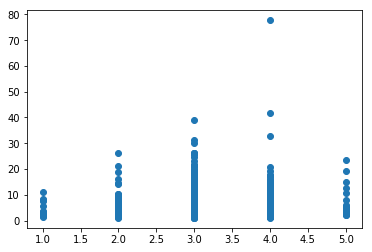

In [58]:
plt.figure(figsize=(6,4)) # локально применяем функцию изменения размеров графика
plt.scatter(df["looks"], df["wage"]) # график рассеяния (диаграмма) признаков looks и wage

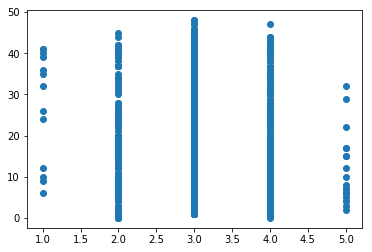

In [59]:
plt.figure(figsize=(6,4)) # локально применяем функцию изменения размеров графика
plt.scatter(df["looks"], df["exper"]) # график рассеяния (диаграмма) признаков looks и exper

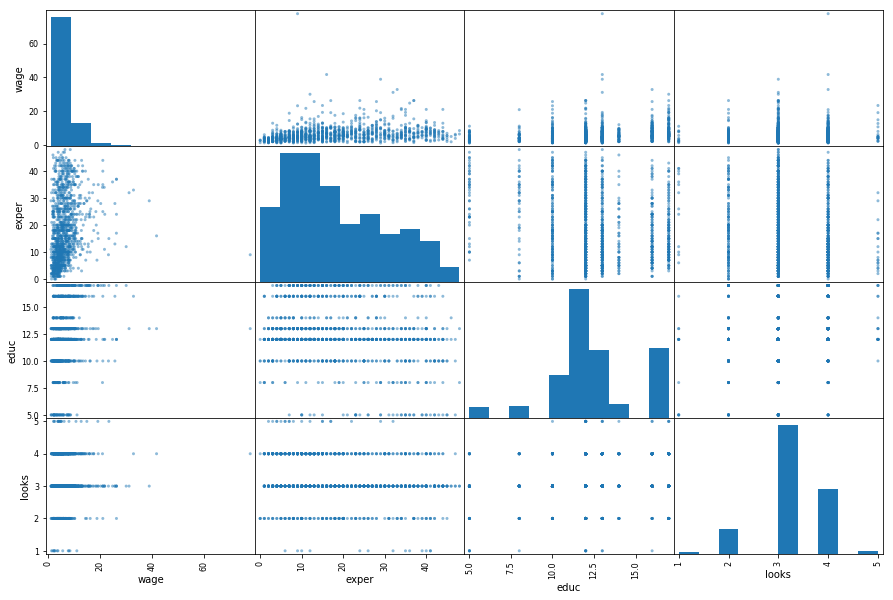

In [60]:
pd.plotting.scatter_matrix(df[["wage", "exper", "educ", "looks"]], figsize=(15,10));

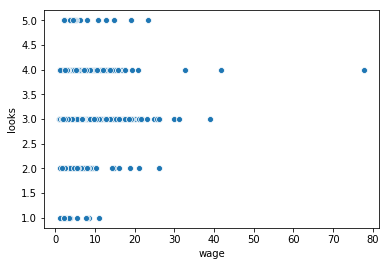

In [61]:
sns.scatterplot(df["wage"], df["looks"]); # диаграмма рассеяния признаков с помощью seaborn

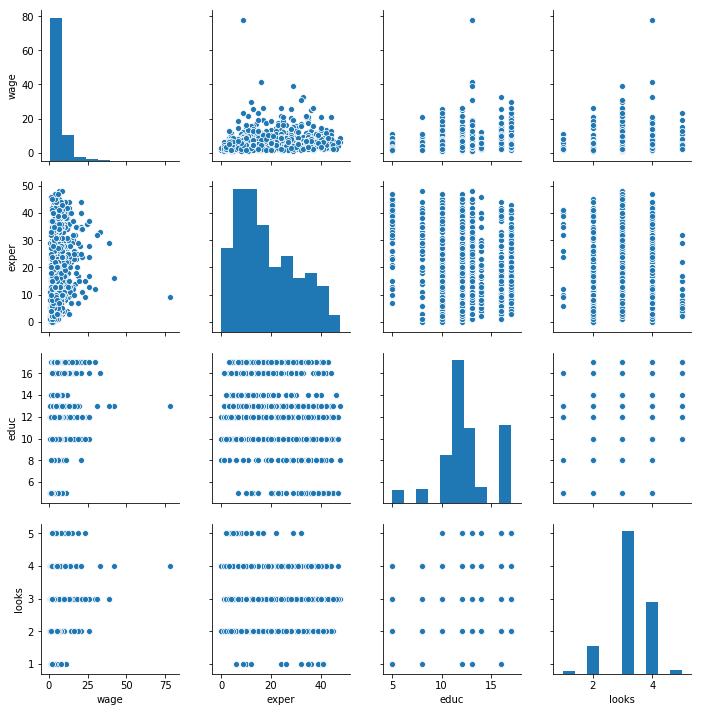

In [62]:
sns.pairplot(df[["wage", "exper", "educ", "looks"]]) # диаграммы рассеяния признаков с помощью seaborn

## Гистограммы распределения

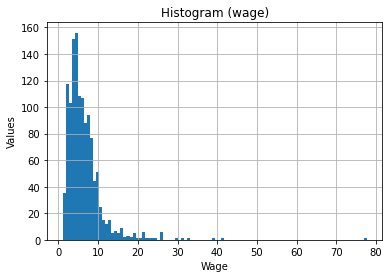

In [8]:
plt.hist(df["wage"], bins=100); #1-й способ построения гистограммы с помощью plt (bins - кол-во интервалов)
plt.grid();
plt.title("Histogram (wage)")
plt.xlabel("Wage")
plt.ylabel("Values");

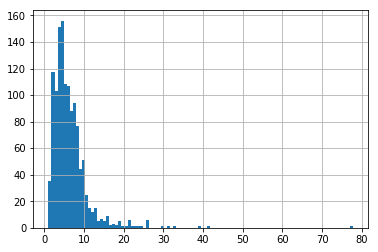

In [69]:
df["wage"].hist(bins = 100); # 2-й гистограмма распределения признака wage

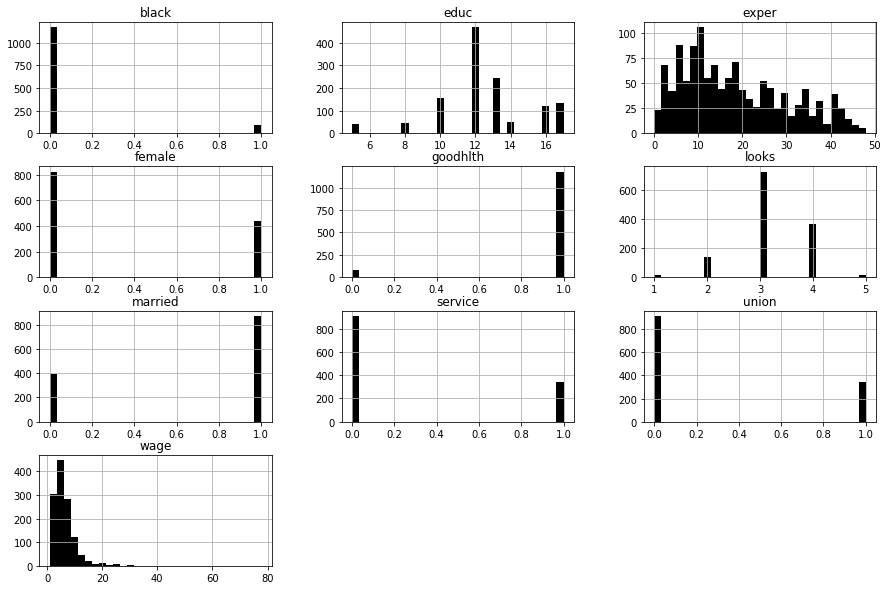

In [65]:
df.hist(figsize = (15,10), color = "k", bins = 30, ); # строим гистограммы всех признаков

**Построение гистограмм в цикле**

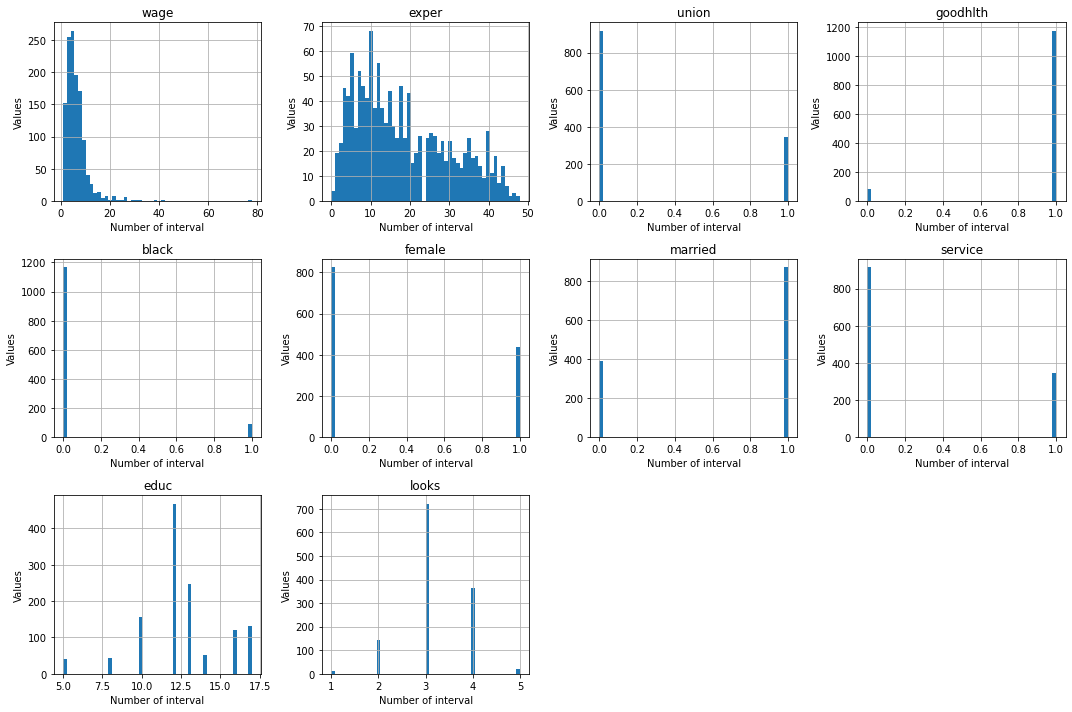

In [10]:
plt.figure(figsize=(15,10))
for ind, col in enumerate(df.columns):
    plt.subplot(3,4,ind+1)
    plt.hist(df[col], bins = 50)
    plt.title(col)
    plt.grid()
    plt.xlabel("Number of interval")
    plt.ylabel("Values")
    plt.tight_layout()

## Ящики с усами (boxplots)

Первый способ с помощью Pandas

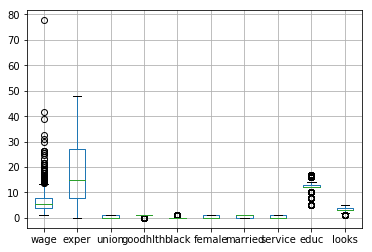

In [72]:
df.boxplot() # признаки в разных масштабах, поэтому смысла в таком графике нет.
# нужно строить для категорий одного или двух признаков в одинаковых масштабах

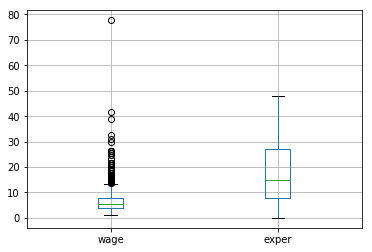

In [73]:
df.boxplot(column=["wage", "exper"])

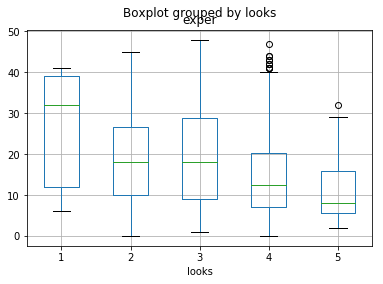

In [75]:
df.boxplot(column="exper", by = "looks") # правильное построение boxplot (с помощью Pandas)

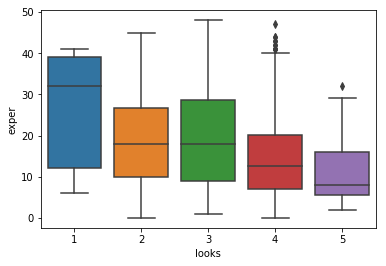

In [82]:
sns.boxplot(data=df, y = "exper", x = "looks" ) # 2-й способ построения boxplots

## Обычный Plot (график в координатах)

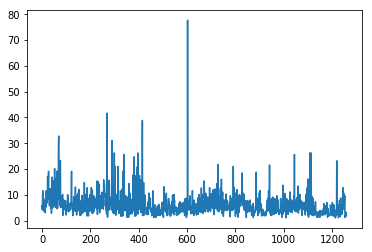

In [84]:
df["wage"].plot() # обычный график в коордианатах

## Countplot (количественная диаграмма)

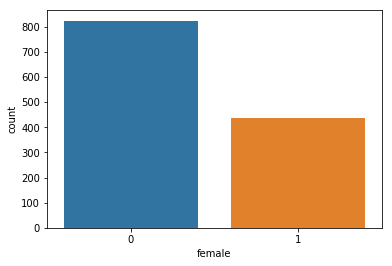

In [85]:
sns.countplot(df["female"])

In [87]:
df["female"].value_counts()

0    824
1    436
Name: female, dtype: int64

## Violinplot (виолончели)

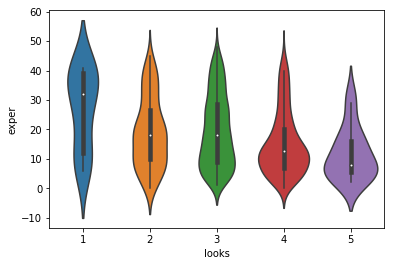

In [92]:
sns.violinplot(data=df, y = "exper", x = "looks"); # график виолончелей (показывает как медиану, выбросы,
# минимум, максимум, так и дисперсию)

## Корреляционные матрицы

In [93]:
df.corr()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


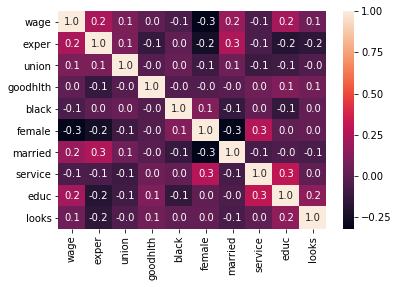

In [95]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")